In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

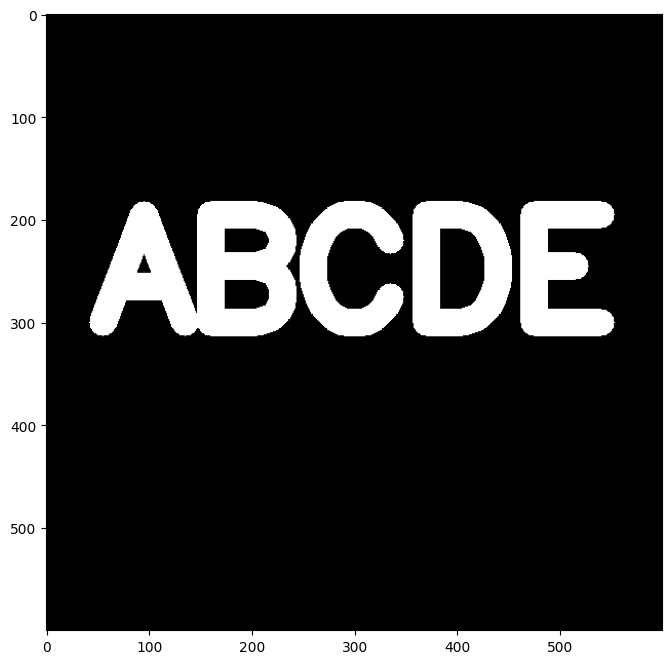

In [2]:
def load_image():
    img = np.zeros(shape=(600, 600))
    img = cv2.putText(
        img,
        text='ABCDE',
        org=(50, 300),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=5,
        color=(255, 255, 255),
        thickness=25,
        lineType=cv2.LINE_AA
    )
    return img

def display_img(image, title=None):
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

img = load_image()
display_img(image=img)

In [3]:
kernel = np.ones(shape=(5, 5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

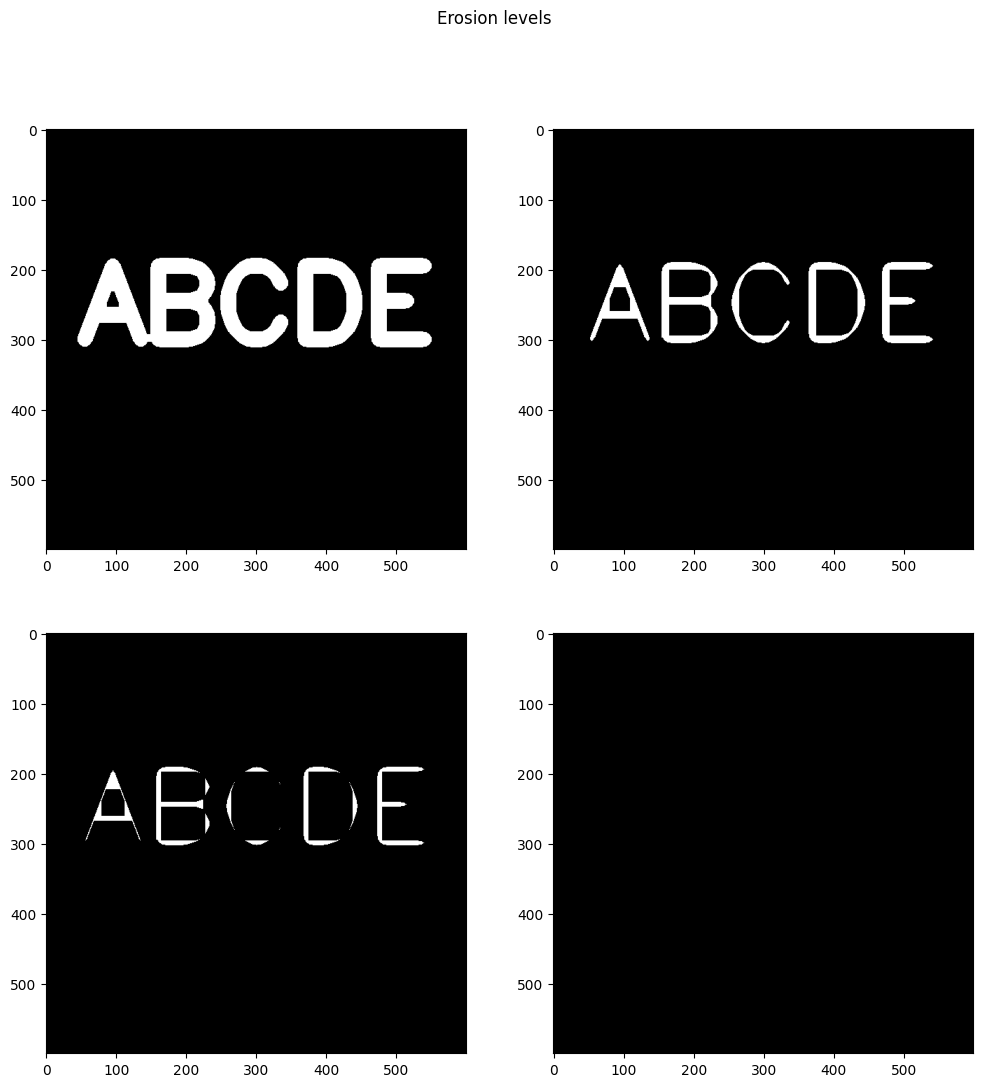

In [4]:
itrs = [1, 4, 5, 10]
plt.figure(figsize=(12, 12))
for idx, itr in enumerate(itrs, 1):
    plt.subplot(2, 2, idx)
    result = cv2.erode(img, kernel, iterations=itr)
    plt.imshow(result, cmap='gray')
plt.suptitle("Erosion levels")
plt.show()

In [5]:
img = load_image()
white_noise = np.random.randint(low=0, high=2, size=img.shape)
white_noise.shape

(600, 600)

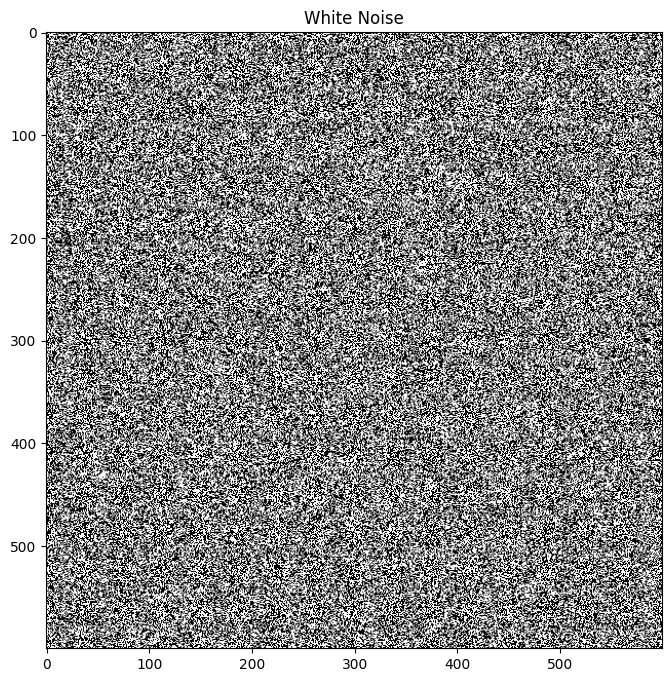

In [6]:
display_img(image=white_noise, title="White Noise")

In [7]:
white_noise = white_noise * 255
white_noise

array([[  0, 255,   0, ...,   0, 255,   0],
       [  0,   0, 255, ..., 255,   0, 255],
       [255, 255,   0, ..., 255,   0,   0],
       ...,
       [  0, 255, 255, ..., 255, 255, 255],
       [255, 255,   0, ..., 255,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0]], shape=(600, 600))

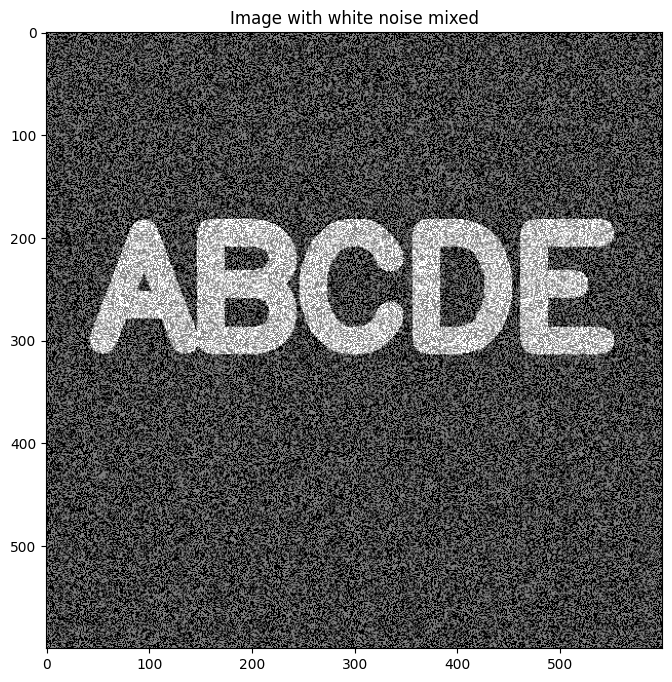

In [8]:
noise_image = white_noise + img
display_img(image=noise_image, title="Image with white noise mixed")

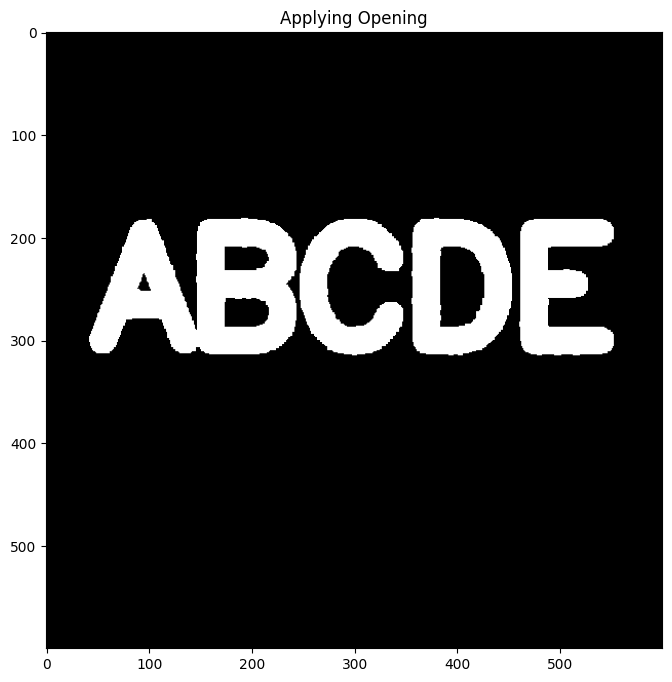

In [9]:
opening = cv2.morphologyEx(noise_image, cv2.MORPH_OPEN, kernel)
display_img(opening, "Applying Opening")

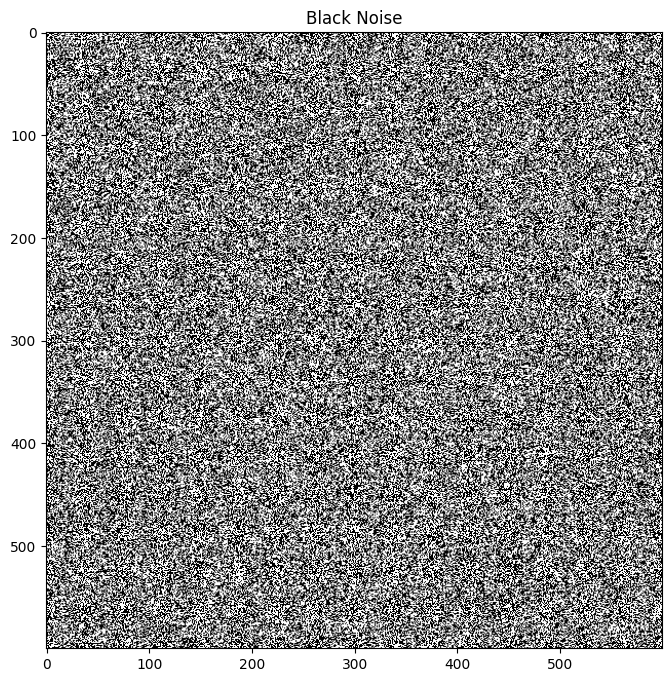

In [10]:
img = load_image()
black_noise = np.random.randint(low=0, high=2, size=img.shape)
black_noise= black_noise * -255
display_img(black_noise, "Black Noise")

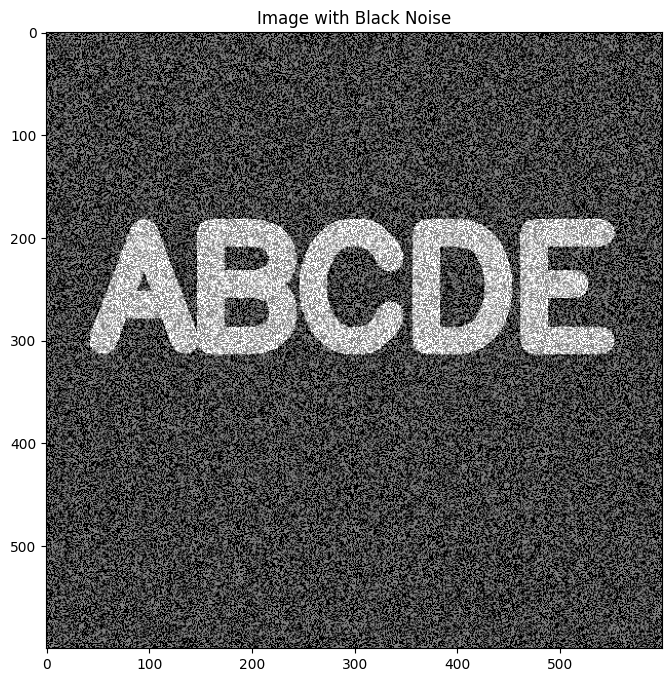

In [11]:
noise_image = black_noise + img
display_img(noise_image, "Image with Black Noise")

In [12]:
black_noise.min()

np.int64(-255)

In [13]:
noise_image[noise_image == -255] = 0
noise_image.min()

np.float64(0.0)

In [14]:
noise_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(600, 600))

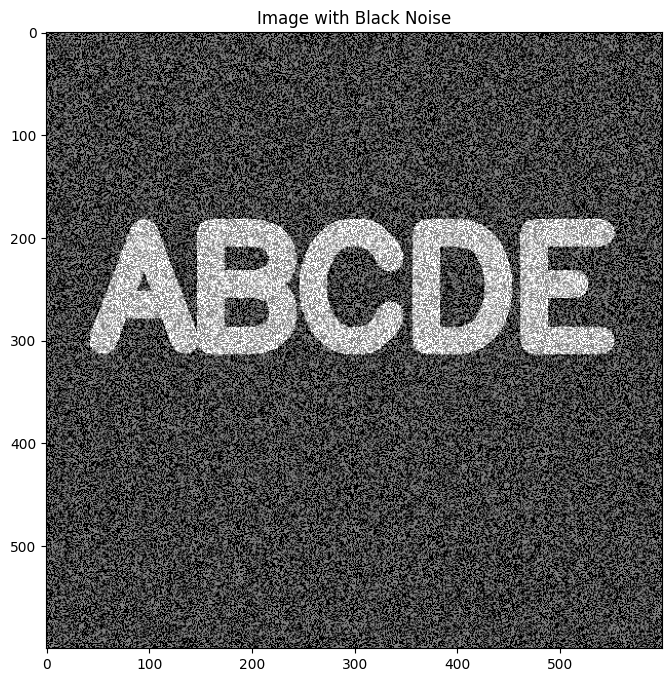

In [15]:
noise_image = black_noise + img
display_img(noise_image, "Image with Black Noise")

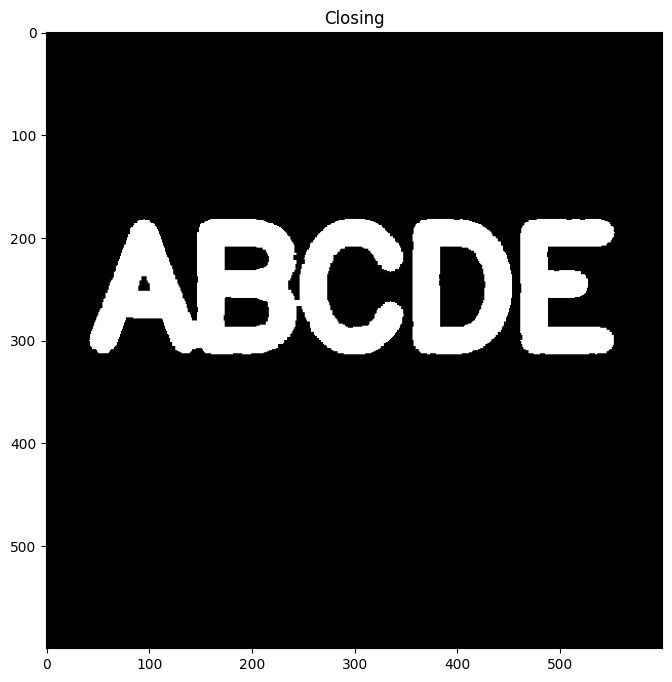

In [16]:
closing = cv2.morphologyEx(noise_image, cv2.MORPH_CLOSE, kernel)
display_img(closing, "Closing")

## Morphological Gradient

Difference between dilation and erosion of an image.

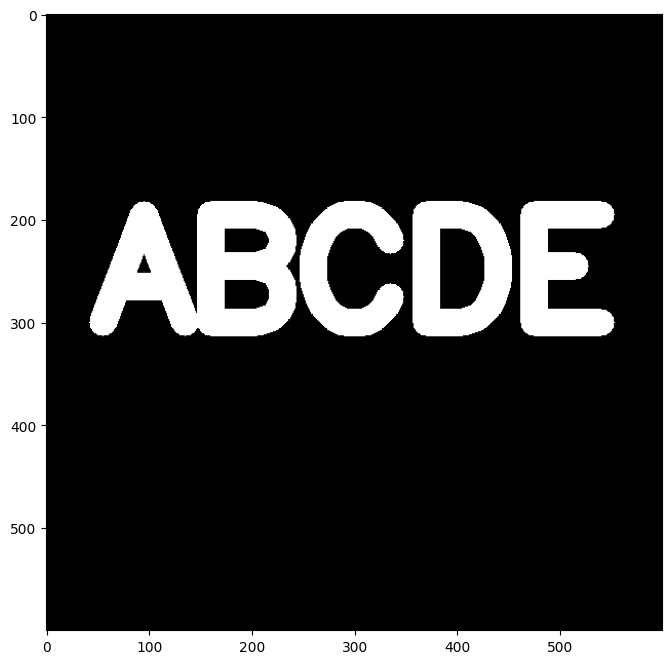

In [18]:
img = load_image()
display_img(img)

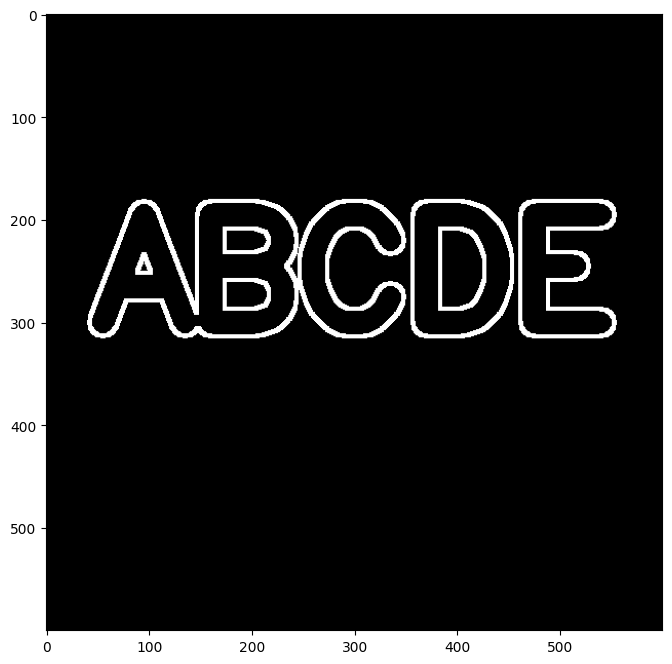

In [19]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)